# Order 1 methods for unconstrained optimization

The goal of this lab is to get a feel for gradient-based optimisation methods. Throughout the lab we will be working with the [Rosenbrock function](https://www.wikiwand.com/en/Rosenbrock_function) which is defined as:

$$f(x,y)=(x_0 - a)^{2}+b(x_0^2 - x_1)^{2}$$

We will be setting the parameters such that $a=1$ and $b=10$, which is:

$$f(x,y)=(x_0 - 1)^{2}+10(x_0^2 - x_1)^{2}$$

The goal is thus to find a pair of values $(x_0, x_1)$ such that $f(x_0, x_1)$ is minimal. The Rosenbrock function is two-dimensional so for each method we should be able to plot the progress of each method, along with [contour lines](https://www.wikiwand.com/en/Contour_line).

Let's start by writing down the Rosenbrock function.

In [1]:
def Rosenbrock(X):
    x0 = X[0]
    x1 = X[1]
    return (x0-1)**2+10*(x0**2-x1)**2

Let's now write down the gradient of the Rosenbrock function.

$$\begin{cases}
\frac{\partial f}{\partial x_0} = 2 (x_0 - a) + 4bx_0 (x_0^2 - x_1) \\
\frac{\partial f}{\partial x_1} = -2b (x_0^2 - x_1)
\end{cases}$$


In [2]:
import numpy as np

def g(X):
    x0 = X[0]
    x1 = X[1]
    gradient = np.zeros((2,1))
    gradient[0]=2*(x0-1)+40*x0*(x0**2-x1)
    gradient[1]=-20*(x0**2-x1)
    return gradient
g([-1, 1])

array([[-4.],
       [ 0.]])

We can draw a contour plot of the function.

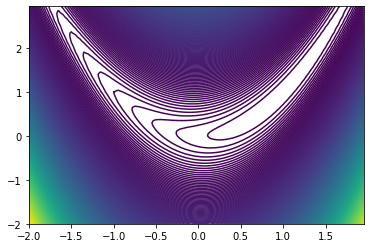

In [3]:
import matplotlib.pyplot as plt

def plot_contour(a, b, c, d, f, ax):
    delta = 0.05
    x0, x1 = np.meshgrid(np.arange(a, b, delta), np.arange(c, d, delta))
    ax.contour(x0, x1, f((x0, x1)), 500)

fig, ax = plt.subplots()

plot_contour(-2, 2, -2, 3, Rosenbrock, ax)

## Vanilla gradient descent

Let's get down to business.

In [4]:
## create a table "trace" which contains the iterates of the gradient descent method
def GPF(g,ro,X,n):
    Xn=np.zeros((n,len(X)))
    Xn[0]=X
    for i in range(1,n):
        # print(ro*g(Xn[i-1]).T[0])
        Xn[i]=Xn[i-1]-ro*g(Xn[i-1]).T[0]
    return Xn

# GPF(g,0.001,[-1., 2.],5)

We can plot the progress of the gradient descent.

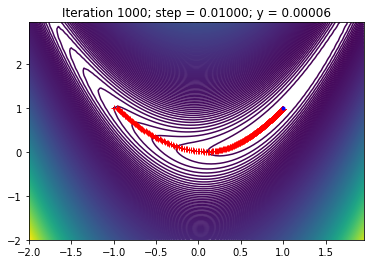

In [5]:
import time


def plot_trace(trace, steps, f, ax):
    for i in range(len(trace)):
        ax.plot(trace[i][0],trace[i][1],"r+")
        ax.set_title('Iteration {}; step = {:.5f}; y = {:.5f}'.format(i+1, steps[i], f((trace[i][0],trace[i][1]))))
        # fig.canvas.draw()

fig, ax = plt.subplots()
plt.ion()


plot_contour(-2, 2, -2, 3, Rosenbrock, ax)

trace = GPF(g,0.01,[-1., 1.],1000)

plot_trace(trace, [0.01] * len(trace), Rosenbrock, ax)
ax.plot(1,1,"b.")
plt.show()

## The Armijo-Goldstein rule

The algorithm is described [here](https://www.wikiwand.com/en/Backtracking_line_search).

The condition we have to satisfy is:

$$f(x + \rho d) \leq f(x) + c \rho \times d^T \nabla f(x)$$

In [6]:
def RLA(f,g,X,d,ro,c1,c2):
    while f(X+ro*d)>f(X)+c1*ro*d.dot(g(X)):
        ro/=2
    return ro


In [7]:
def GRL(f,g,rlin,X,ro,n,c1=0.4,c2=0.6):
    Xn=np.zeros((n,len(X)))
    Ro=np.zeros(n)
    Xn[0]=X
    for i in range(1,n):
        alpha=rlin(f,g,Xn[i-1],-g(Xn[i-1]).T[0],ro,c1,c2)
        Xn[i]=Xn[i-1]-alpha*g(Xn[i-1]).T[0]
        Ro[i]=alpha
    return Xn, Ro
        

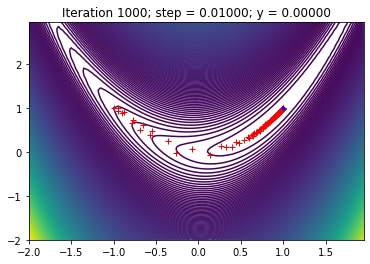

[0.99999684 0.99999348]
7.2435451431147706e-06


In [8]:
def plot_trace(trace, steps, f, ax):
    for i in range(len(trace)):
        ax.plot(trace[i][0],trace[i][1],"r+")
        ax.set_title('Iteration {}; step = {:.5f}; y = {:.5f}'.format(i+1, steps[i], f((trace[i][0],trace[i][1]))))


fig, ax = plt.subplots()
plt.ion()

X=np.array([-1.,1.])
plot_contour(-2, 2, -2, 3, Rosenbrock, ax)

trace = GRL(Rosenbrock,g,RLA,X,0.11,1000)[0]

plot_trace(trace, [0.01] * len(trace), Rosenbrock, ax)
ax.plot(1,1,'b.')
plt.show()


print(trace[-1])
print(np.sqrt(sum((trace[-1]-np.ones(2))**2)))

## The Wolfe conditions

The two conditions are:

1. $f(x + \rho d) \leq f(x) + c_1 \rho \times d^T \nabla f(x)$
2. $-d^T \nabla f(x + \rho d) \leq -c_2 d^T \nabla f(x) $ 

The first condition is the Armijo-Goldstein rule while the second condition is known as the **curvature condition**.

In [9]:
def RLW(f,g,X,d,ro,c1=0.4,c2=0.6):
    romax=10
    romin=0
    iter=0
    while iter<1000 and (f(X+ro*d)>f(X)+c1*ro*d.dot(g(X)) or d.dot(g(X+ro*d))<c2*d.dot(g(X))):
        if f(X+ro*d)>f(X)+c1*ro*d.dot(g(X)):
            romax=ro
            ro=(romin+romax)/2
        else:
            romin=ro
            ro=(romin+romax)/2
        iter+=1
    return ro


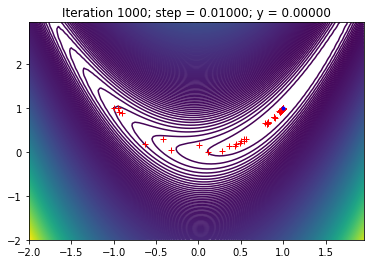

[0.9999998  0.99999959]
4.588964580270387e-07


In [10]:
import time


def plot_trace(trace, steps, f, ax):
    for i in range(len(trace)):
        ax.plot(trace[i][0],trace[i][1],"r+")
        ax.set_title('Iteration {}; step = {:.5f}; y = {:.5f}'.format(i+1, steps[i], f((trace[i][0],trace[i][1]))))

fig, ax = plt.subplots()
plt.ion()

X=np.array([-1.,1.])
plot_contour(-2, 2, -2, 3, Rosenbrock, ax)

trace = GRL(Rosenbrock,g,RLW,X,0.1,1000)[0]

plot_trace(trace, [0.01] * len(trace), Rosenbrock, ax)
ax.plot(1,1,'b.')
plt.show()

print(trace[-1])
print(np.sqrt(sum((trace[-1]-np.ones(2))**2)))



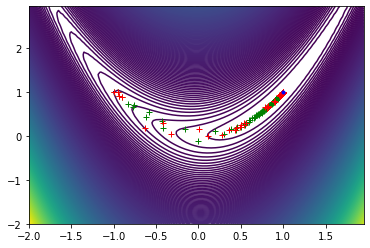

In [11]:
fig, ax = plt.subplots()
plt.ion()

X=np.array([-1.,1.])
plot_contour(-2, 2, -2, 3, Rosenbrock, ax)

armijo = trace = GRL(Rosenbrock,g,RLA,X,0.1,1000)[0]
wolfe = GRL(Rosenbrock,g,RLW,X,0.1,1000)[0]

for i in range(len(trace)):
    ax.plot(armijo[i][0],armijo[i][1],"g+")
for i in range(len(trace)):
    ax.plot(wolfe[i][0],wolfe[i][1],"r+")

ax.plot(1,1,'b.')
plt.show()

## Computing the optimal step size
For $X = (x_0,x_1) \in \mathbb{R}^2$, $D = (d_0, d_1) \in \mathbb{R}^2$, and $t \in \mathbb{R}$,
\begin{align*}
    f(X + t D) = \quad & ((x_0 + td_0) - 1)^{2}+10((x_0+t d_0)^2 - (x_1+t d_1))^{2}\\
    =\quad & t^4( 10 d_0^4) \\
    +\;&t^3  (40 d_0^3 x_0 - 20  d_0^2 d_1) \\
    +\;&t^2 (60  d_0^2  x_0^2 - 20  d_0^2  x_1 + d_0^2 - 40  d_0  d_1  x_0 + 10  d_1^2 ) \\
    +\;&t (40 d_0 x_0^3 - 40 d_0 x_0 x_1 + 2 d_0 x_0 - 2 d_0   - 20 d_1 x_0^2 + 20 d_1 x_1) \\
    +\;& 10 x_0^4 - 20 x_0^2 x_1 + x_0^2 - 2 x_0 + 10 x_1^2 + 1
\end{align*}

In [12]:
def GPE(g,X,n):
    Z=np.ones((n,len(X)))
    Z[0]=X
    Ro=np.zeros(n)
    Y=X.copy()
    x0,x1=Y
    d0,d1=-g(Y).T[0]
    i=1
    while i<n and (x0!=1 or x1!=1):
        t4=10*d0**4
        t3=40*d0**3*x0 - 20*d0**2*d1
        t2=60*d0**2*x0**2 - 20*d0**2*x1 + d0**2 - 40*d0*d1*x0 + 10*d1**2 
        t1=40*d0*x0**3 - 40*d0*x0*x1 + 2*d0*x0 - 2*d0 - 20*d1*x0**2 + 20*d1*x1
        t0=10*x0**4 - 20*x0**2*x1 + x0**2 - 2*x0 + 10*x1**2 + 1
        racine = np.roots([t4,t3,t2,t1,t0])
        racine=racine[np.where(racine>0)]
        racine = racine[np.where(abs(racine.imag)==min(abs(racine.imag)))]
        ro=min(racine[np.where(racine.real >0)].real)
        Ro[i]=ro
        Y-=ro*g(Y).T[0]
        Z[i]=Y.copy()
        d0,d1=-g(Y).T[0]
        x0,x1=Y
        i+=1
    return Z,Ro
    
GPE(g,np.array([-1., 2.]),6)

(array([[-1.        ,  2.        ],
        [-1.33860927,  1.81188374],
        [ 1.23222073,  1.52657172],
        [ 1.12402326,  1.23112397],
        [ 1.11011403,  1.23640869],
        [ 0.99494043,  1.00370055]]),
 array([0.        , 0.00940581, 0.71296062, 1.8006815 , 0.0081796 ,
        2.86902021]))

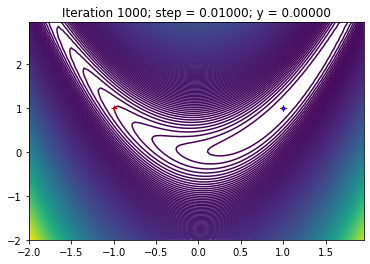

In [16]:
def plot_trace(trace, steps, f, ax):
    for i in range(len(trace)):
        ax.plot(trace[i][0],trace[i][1],"r+")
        ax.set_title('Iteration {}; step = {:.5f}; y = {:.5f}'.format(i+1, steps[i], f((trace[i][0],trace[i][1]))))
        # fig.canvas.draw()
        

fig, ax = plt.subplots()
plt.ion()

X=np.array([-1.,1.])
plot_contour(-2, 2, -2, 3, Rosenbrock, ax)

trace = GPE(g,X,1000)[0]

plot_trace(trace, [0.01] * len(trace), Rosenbrock, ax)
ax.plot(1,1,'b.')
plt.show()

## Global comparison

ok
ok2


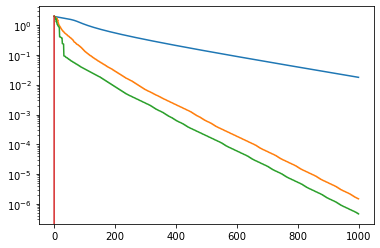

In [14]:
X=np.array([-1.,1.])
N=1000
con = GPF(g,0.01,X,N)

rla = GRL(Rosenbrock,g,RLA,X,0.1,N)[0]
print("ok")
rlw = GRL(Rosenbrock,g,RLW,X,0.1,N)[0]
print("ok2")
gpe = GPE(g,X,N)[0]

graph=np.zeros((4,N))
result=np.ones(2)

for i in range(N):
    graph[0,i]=np.sqrt(sum((con[i]-result)**2))
    graph[1,i]=np.sqrt(sum((rla[i]-result)**2))
    graph[2,i]=np.sqrt(sum((rlw[i]-result)**2))
    graph[3,i]=np.sqrt(sum((gpe[i]-result)**2))
plt.semilogy(graph[0])
plt.semilogy(graph[1])
plt.semilogy(graph[2])
plt.semilogy(graph[3])
plt.show()

ok
ok2


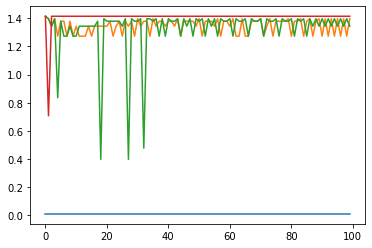

In [15]:
X=np.array([-1.,1.])
N=100

alphaRla = GRL(Rosenbrock,g,RLA,X,0.1,N)[1]
print("ok")
alphaRlw = GRL(Rosenbrock,g,RLW,X,0.1,N)[1]
print("ok2")
alphaGpe = GPE(g,X,N)[1]

graphAlpha=np.zeros((3,N))
result=np.ones(2)

for i in range(N):
    graphAlpha[0,i]=np.sqrt(sum((alphaRla[i]-result)**2))
    graphAlpha[1,i]=np.sqrt(sum((alphaRlw[i]-result)**2))
    graphAlpha[2,i]=np.sqrt(sum((alphaGpe[i]-result)**2))
    
plt.plot([0.01]*N)
plt.plot(graphAlpha[0])
plt.plot(graphAlpha[1])
plt.plot(graphAlpha[2])
plt.show()